# Modelo de detección de enfermedades de tiroides

## Carga de datos y simplificación de las categorías de la variable objetivo

In [2]:
import pandas as pd
file_path = "data/thyroidDF.csv"
df = pd.read_csv(file_path)

# Simplify the target variable
class_mapping = {
    '-': 'negative',
    'K': 'hyperthyroid', 'B': 'hyperthyroid', 'H|K': 'hyperthyroid',
    'KJ': 'hyperthyroid', 'GI': 'hyperthyroid',
    'G': 'hypothyroid', 'I': 'hypothyroid', 'F': 'hypothyroid', 'C|I': 'hypothyroid',
    'E': 'negative', 'LJ': 'negative', 'D|R': 'negative',
}

df['target'] = df['target'].map(class_mapping)

# Drop rows with unmapped or missing target
df = df.dropna(subset=['target'])

# Check class distribution after mapping
print("Class distribution:")
print(df['target'].value_counts())


Class distribution:
target
negative        6774
hypothyroid      950
hyperthyroid     486
Name: count, dtype: int64


--- Continua a partir de aquí con tu análisis y solución del problema. ---

## Análisis y preprocesamiento de los datos:

In [3]:
# librerias necesarias
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score


In [4]:
df.head()  # Muestra las primeras filas

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,negative,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,negative,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,negative,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,negative,840803046
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,negative,840803048


### Análisis

In [5]:
df.info()  # Información general

<class 'pandas.core.frame.DataFrame'>
Index: 8210 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8210 non-null   int64  
 1   sex                  7943 non-null   object 
 2   on_thyroxine         8210 non-null   object 
 3   query_on_thyroxine   8210 non-null   object 
 4   on_antithyroid_meds  8210 non-null   object 
 5   sick                 8210 non-null   object 
 6   pregnant             8210 non-null   object 
 7   thyroid_surgery      8210 non-null   object 
 8   I131_treatment       8210 non-null   object 
 9   query_hypothyroid    8210 non-null   object 
 10  query_hyperthyroid   8210 non-null   object 
 11  lithium              8210 non-null   object 
 12  goitre               8210 non-null   object 
 13  tumor                8210 non-null   object 
 14  hypopituitary        8210 non-null   object 
 15  psych                8210 non-null   object

In [6]:
df.describe() # Resumen de los datos

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,8210.000000,7492.000000,5897.000000,7854.000000,7518.000000,7525.000000,259.000000,8.210000e+03
mean,76.114616,5.123255,1.925248,104.339529,0.983067,107.569155,23.186680,8.529801e+08
std,1251.387767,24.920496,0.732331,30.374396,0.199412,27.616805,7.239849,7.564794e+06
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.600000,1.500000,87.000000,0.860000,93.000000,20.000000,8.504103e+08
50%,55.000000,1.400000,1.900000,102.000000,0.960000,107.000000,23.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,121.000000,1.070000,124.000000,27.000000,8.607133e+08
max,65526.000000,530.000000,9.500000,292.000000,2.330000,332.000000,86.000000,8.701190e+08


In [7]:
df.isnull().sum()

age                       0
sex                     267
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     718
T3_measured               0
T3                     2313
TT4_measured              0
TT4                     356
T4U_measured              0
T4U                     692
FTI_measured              0
FTI                     685
TBG_measured              0
TBG                    7951
referral_source           0
target                    0
patient_id                0
dtype: int64

### Borrado de filas y columnas

In [8]:
#borro los registros de la columna sex que son nulos
#borro la columna patient_id porque no aporta información
#borro la columna TGB porque tiene muchos valores nulos y TBG_measured ya que van de la mano
#borro la columna referral_source porque no aporta información
df = df.dropna(subset=['sex'])
df = df.drop(columns=['patient_id'])
df = df.drop(columns=['TBG_measured'])
df = df.drop(columns=['TBG'])
df = df.drop(columns=['referral_source'])


### Conversiones de datos

In [9]:
#Comprobamos los valores de las columnas de tipo object para convertirlas a numéricas
for col in df.select_dtypes(include=["object"]).columns:  # Filtra solo columnas tipo 'object'
    print(f" Columna: {col}")
    print(df[col].value_counts(), "\n")  # Cuenta valores únicos

 Columna: sex
sex
F    5364
M    2579
Name: count, dtype: int64 

 Columna: on_thyroxine
on_thyroxine
f    7071
t     872
Name: count, dtype: int64 

 Columna: query_on_thyroxine
query_on_thyroxine
f    7810
t     133
Name: count, dtype: int64 

 Columna: on_antithyroid_meds
on_antithyroid_meds
f    7846
t      97
Name: count, dtype: int64 

 Columna: sick
sick
f    7632
t     311
Name: count, dtype: int64 

 Columna: pregnant
pregnant
f    7847
t      96
Name: count, dtype: int64 

 Columna: thyroid_surgery
thyroid_surgery
f    7838
t     105
Name: count, dtype: int64 

 Columna: I131_treatment
I131_treatment
f    7805
t     138
Name: count, dtype: int64 

 Columna: query_hypothyroid
query_hypothyroid
f    7408
t     535
Name: count, dtype: int64 

 Columna: query_hyperthyroid
query_hyperthyroid
f    7410
t     533
Name: count, dtype: int64 

 Columna: lithium
lithium
f    7854
t      89
Name: count, dtype: int64 

 Columna: goitre
goitre
f    7862
t      81
Name: count, dtype: int64 

In [10]:
# Convertimos las columnas con valores categóricos a booleanos

# Filtrar columnas de tipo 'object' con solo 2 valores únicos
columnas_binarias = [col for col in df.select_dtypes(include=["object"]).columns if df[col].nunique() == 2]

# Convertir boolean usando map()
for col in columnas_binarias:
    valores = df[col].unique()  # Obtener los dos valores únicos
    df[col] = df[col].map({valores[0]: False, valores[1]: True})  # Mapearlos a false y true

print("Columnas convertidas a binario:", columnas_binarias)




Columnas convertidas a binario: ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']


In [11]:
#para poner analizar la correlacion con la variable objetivo transformamos la variable target a numerica

df["target"] = df["target"].map({"hyperthyroid": 2, "hypothyroid": 1, "negative": 0}) # Mapear a valores numéricos

df.info()  # Información general

<class 'pandas.core.frame.DataFrame'>
Index: 7943 entries, 0 to 9171
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7943 non-null   int64  
 1   sex                  7943 non-null   bool   
 2   on_thyroxine         7943 non-null   bool   
 3   query_on_thyroxine   7943 non-null   bool   
 4   on_antithyroid_meds  7943 non-null   bool   
 5   sick                 7943 non-null   bool   
 6   pregnant             7943 non-null   bool   
 7   thyroid_surgery      7943 non-null   bool   
 8   I131_treatment       7943 non-null   bool   
 9   query_hypothyroid    7943 non-null   bool   
 10  query_hyperthyroid   7943 non-null   bool   
 11  lithium              7943 non-null   bool   
 12  goitre               7943 non-null   bool   
 13  tumor                7943 non-null   bool   
 14  hypopituitary        7943 non-null   bool   
 15  psych                7943 non-null   bool  

### Visualización de los datos para detectar outsiders o posibles faltas de datos

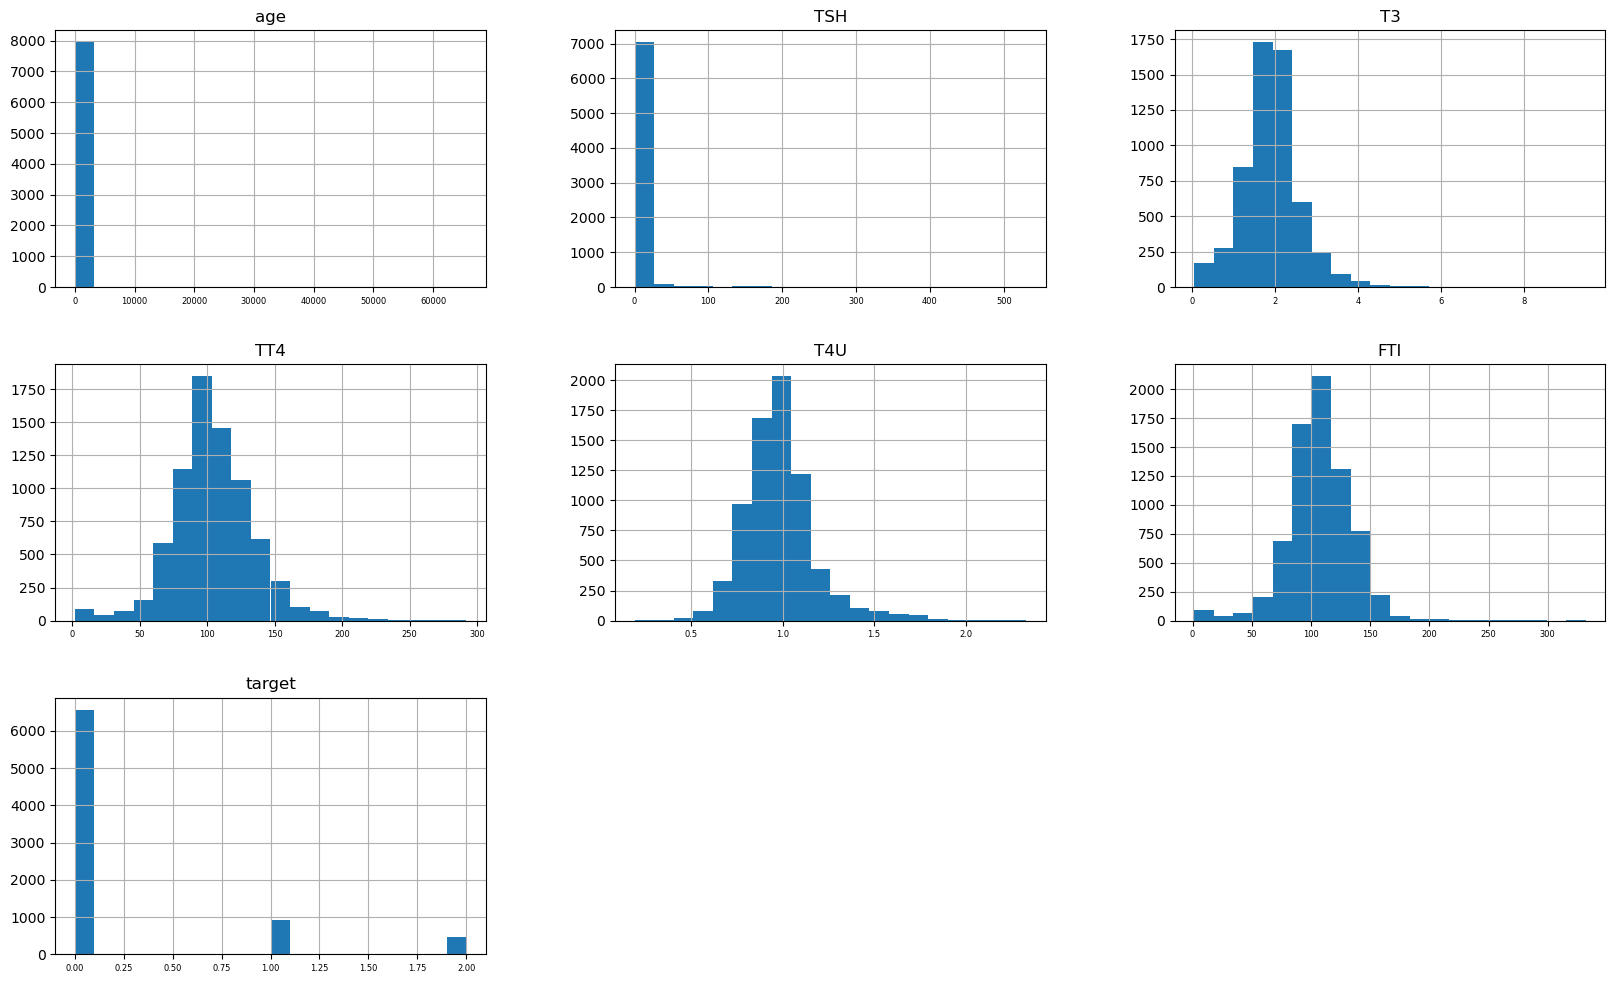

In [12]:

_ = df.hist(bins=20, figsize=(20, 12), xlabelsize=6) 

### Análisis de correlaciones

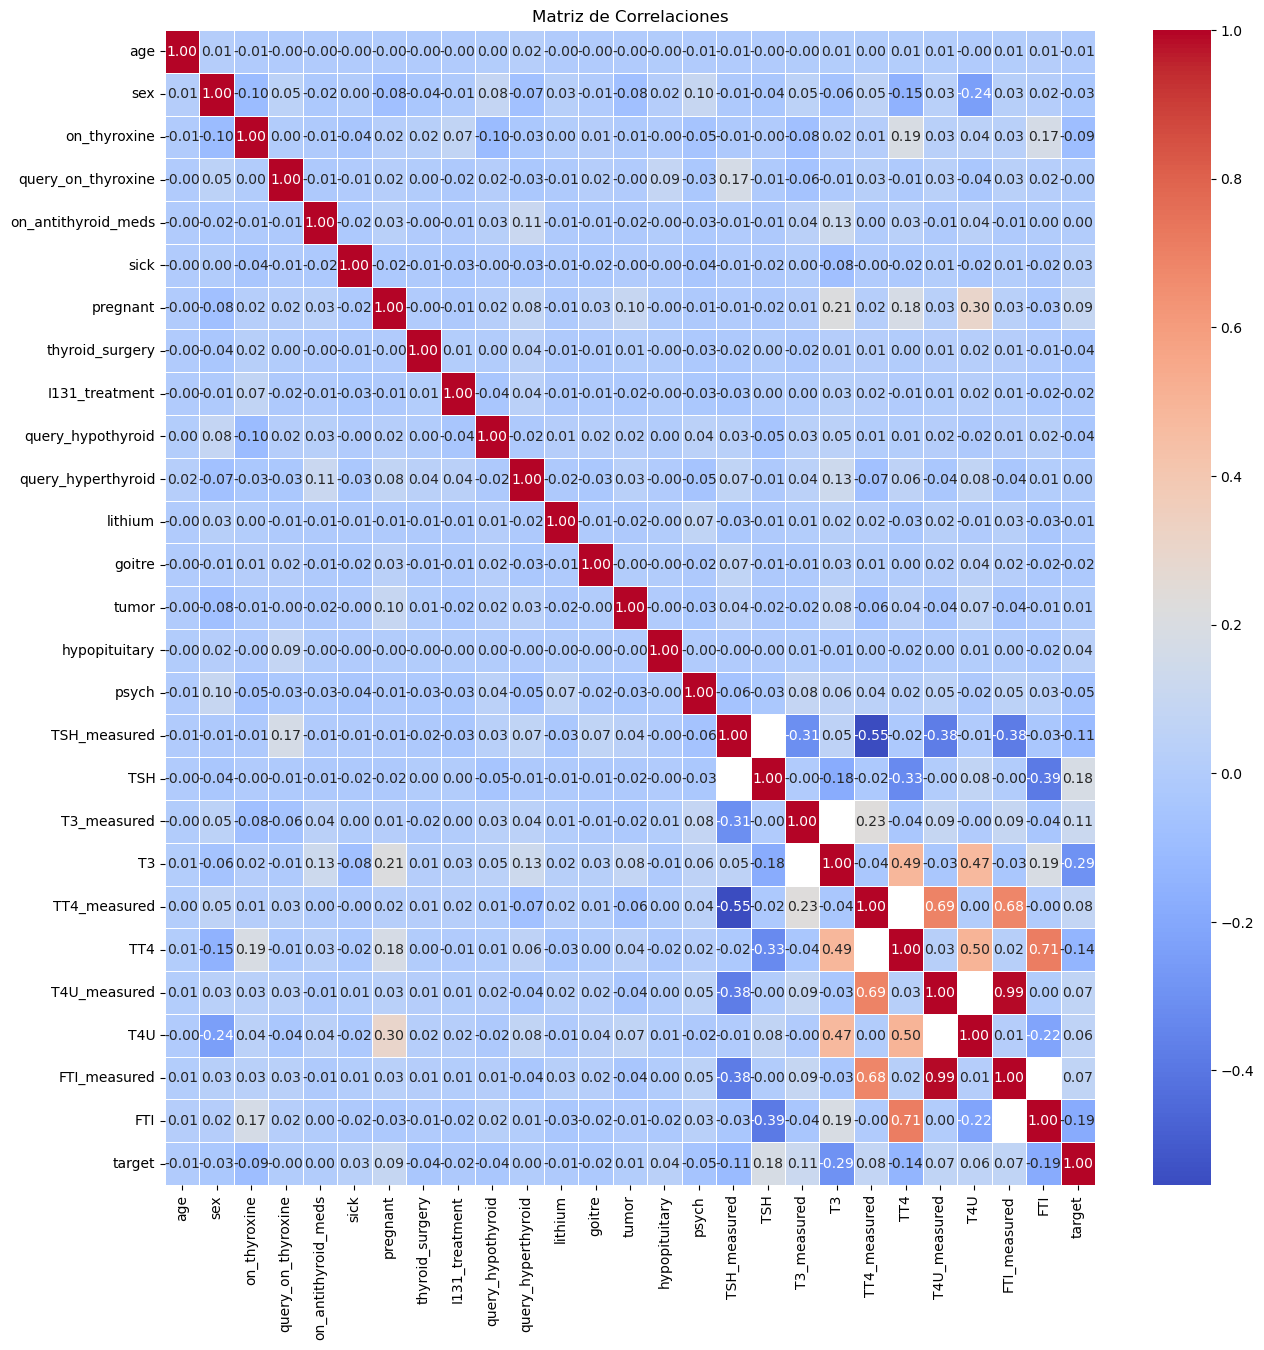

In [13]:
# Matriz de correlaciones de las variables numéricas y booleanas
correlaciones_numericas = df.select_dtypes(include=["number","bool"]).corr()

plt.figure(figsize=(15, 15))  # Ajusta el tamaño de la figura
sns.heatmap(correlaciones_numericas, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

### Separación entre train y test

En este punto, después de haber binarizado y borrado las columnas oportunas, divido el dataset para que test no esté condicionado por el preprocesamiento

In [14]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(train_set["target"].value_counts())
print(test_set["target"].value_counts())


target
0    5239
1     728
2     387
Name: count, dtype: int64
target
0    1323
1     181
2      85
Name: count, dtype: int64


### Eliminación de Outsiders

Detecto valores extraños en age y TSH así que borraremos los datos que pueden perjudicar el entrenamiento.
Si conociera los valores normales de las mediciones médicas (TSH) podría hacer un filtrado más específico pero lo hago así de una manera genérica.

In [15]:
# Calcular los cuartiles (Q1 y Q3) y el IQR
train_set_numeric = train_set.select_dtypes(include=["number"])  # Filtrar solo columnas numéricas

train_set_numeric = train_set_numeric.drop(columns=['target']) # Eliminar la columna target

Q1 = train_set_numeric.quantile(0.25)
Q3 = train_set_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores dentro del rango (sin valores atípicos)
train_set = train_set[~((train_set_numeric < (Q1 - 1.5 * IQR)) | (train_set_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Registros eliminados: {len(train_set_numeric) - len(train_set)}")

Registros eliminados: 960


In [16]:
train_set.describe() # Resumen de los datos

,age,TSH,T3,TT4,T4U,FTI,target
count,5394.000000,4857.000000,3846.000000,5139.000000,4927.000000,4931.000000,5394.000000
mean,52.747868,1.537837,1.888716,104.382176,0.954699,110.094099,0.137931
std,18.794936,1.261965,0.552436,22.544439,0.143994,21.189497,0.486681
min,1.000000,0.005000,0.400000,37.000000,0.550000,49.000000,0.000000
25%,38.000000,0.540000,1.500000,89.000000,0.860000,95.000000,0.000000
50%,55.000000,1.300000,1.900000,103.000000,0.950000,109.000000,0.000000
75%,68.000000,2.200000,2.300000,119.000000,1.050000,124.000000,0.000000
max,97.000000,5.600000,3.400000,172.000000,1.380000,170.000000,2.000000


In [17]:
train_set.info()  # Información general

<class 'pandas.core.frame.DataFrame'>
Index: 5394 entries, 4467 to 8424
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5394 non-null   int64  
 1   sex                  5394 non-null   bool   
 2   on_thyroxine         5394 non-null   bool   
 3   query_on_thyroxine   5394 non-null   bool   
 4   on_antithyroid_meds  5394 non-null   bool   
 5   sick                 5394 non-null   bool   
 6   pregnant             5394 non-null   bool   
 7   thyroid_surgery      5394 non-null   bool   
 8   I131_treatment       5394 non-null   bool   
 9   query_hypothyroid    5394 non-null   bool   
 10  query_hyperthyroid   5394 non-null   bool   
 11  lithium              5394 non-null   bool   
 12  goitre               5394 non-null   bool   
 13  tumor                5394 non-null   bool   
 14  hypopituitary        5394 non-null   bool   
 15  psych                5394 non-null   boo

### Completo los nulos con la mediana para poder ejecutar los modelos

In [18]:
# Rellenar los valores nulos con la mediana de cada columna numérica
train_set[train_set.select_dtypes(include=["number"]).columns] = train_set.select_dtypes(include=["number"]).fillna(train_set.median())

train_set.info()  # Información general


<class 'pandas.core.frame.DataFrame'>
Index: 5394 entries, 4467 to 8424
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5394 non-null   int64  
 1   sex                  5394 non-null   bool   
 2   on_thyroxine         5394 non-null   bool   
 3   query_on_thyroxine   5394 non-null   bool   
 4   on_antithyroid_meds  5394 non-null   bool   
 5   sick                 5394 non-null   bool   
 6   pregnant             5394 non-null   bool   
 7   thyroid_surgery      5394 non-null   bool   
 8   I131_treatment       5394 non-null   bool   
 9   query_hypothyroid    5394 non-null   bool   
 10  query_hyperthyroid   5394 non-null   bool   
 11  lithium              5394 non-null   bool   
 12  goitre               5394 non-null   bool   
 13  tumor                5394 non-null   bool   
 14  hypopituitary        5394 non-null   bool   
 15  psych                5394 non-null   boo

## Entrenamiento

### Preparo las variables X e y

In [19]:
# Separar en X e y para train y test
X_train = train_set.drop(columns=['target'])
y_train = train_set['target']

test_set = test_set.dropna()  # Eliminar valores nulos en el conjunto de prueba ya que falla en ciertos modelos
X_test = test_set.drop(columns=['target'])
y_test = test_set['target']

print(y_train.value_counts())



target
0    4968
2     318
1     108
Name: count, dtype: int64


### Random Forest

Accuracy del modelo: 0.8736842105263158
Precisión: 0.8701929782714749
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       854
           1       0.69      0.24      0.35       114
           2       0.57      0.84      0.68        77

    accuracy                           0.87      1045
   macro avg       0.73      0.68      0.66      1045
weighted avg       0.87      0.87      0.86      1045



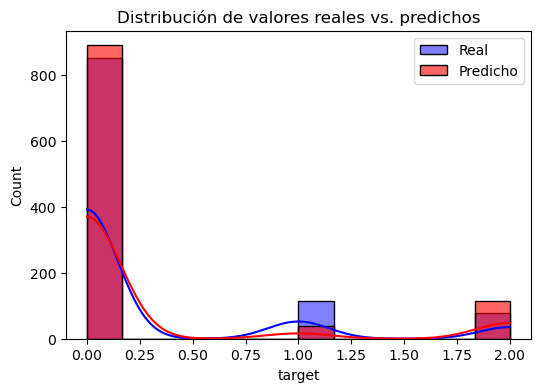

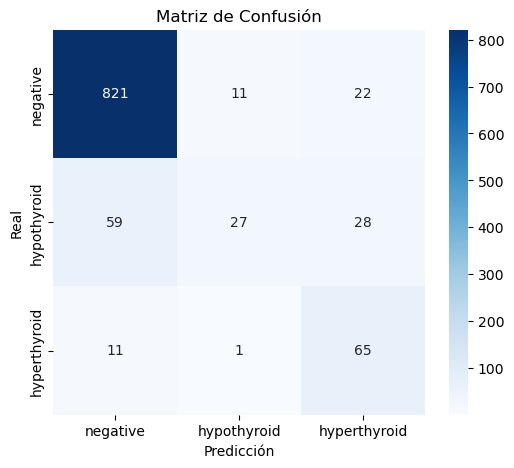

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')
print("Precisión:", precision_score(y_test, y_pred, average='weighted'))

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(6,4))
sns.histplot(y_test, color="blue", label="Real", kde=True)
sns.histplot(y_pred, color="red", label="Predicho", kde=True, alpha=0.6)
plt.legend()
plt.title('Distribución de valores reales vs. predichos')
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "hypothyroid", "hyperthyroid"], yticklabels=["negative", "hypothyroid", "hyperthyroid"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

### Random Forest con cross-validation

Accuracy del modelo (validación cruzada): 0.9762699295513534
Precisión: 0.9757159539685043
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4968
           1       0.85      0.56      0.67       108
           2       0.87      0.92      0.89       318

    accuracy                           0.98      5394
   macro avg       0.90      0.82      0.85      5394
weighted avg       0.98      0.98      0.98      5394



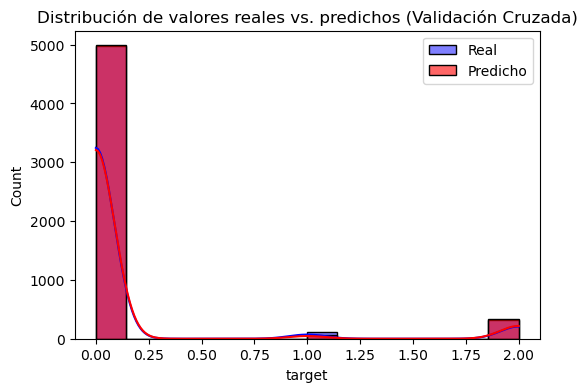

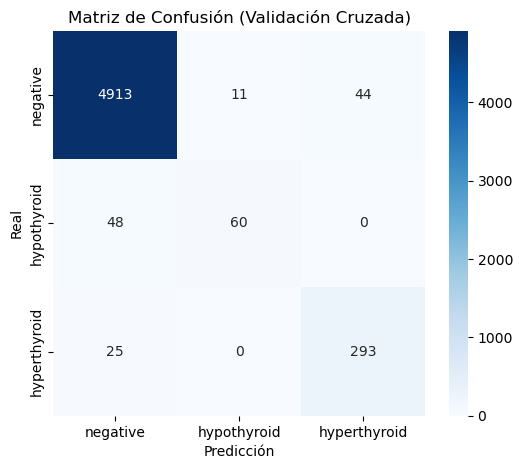

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Obtener predicciones con validación cruzada (simula test sin usar X_test)
y_pred_cv = cross_val_predict(rf_model, X_train, y_train, cv=5)

# Evaluar el modelo con los datos de entrenamiento usando validación cruzada
accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='weighted')

print(f'Accuracy del modelo (validación cruzada): {accuracy}')
print(f'Precisión: {precision}')

# Mostrar el reporte de clasificación
print(classification_report(y_train, y_pred_cv))

# Crear la matriz de confusión
cm = confusion_matrix(y_train, y_pred_cv)

# Graficar la distribución de valores reales vs. predichos
plt.figure(figsize=(6,4))
sns.histplot(y_train, color="blue", label="Real", kde=True)
sns.histplot(y_pred_cv, color="red", label="Predicho", kde=True, alpha=0.6)
plt.legend()
plt.title('Distribución de valores reales vs. predichos (Validación Cruzada)')
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["negative", "hypothyroid", "hyperthyroid"], 
            yticklabels=["negative", "hypothyroid", "hyperthyroid"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Validación Cruzada)")
plt.show()


### Random Forest con GridSearchCV y Validación Cruzada

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy del modelo (validación cruzada): 0.9756007393715342
Precisión: 0.9761433473235233
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4990
           1       0.96      0.51      0.67       107
           2       0.84      0.92      0.88       313

    accuracy                           0.98      5410
   macro avg       0.93      0.81      0.85      5410
weighted avg       0.98      0.98      0.97      5410



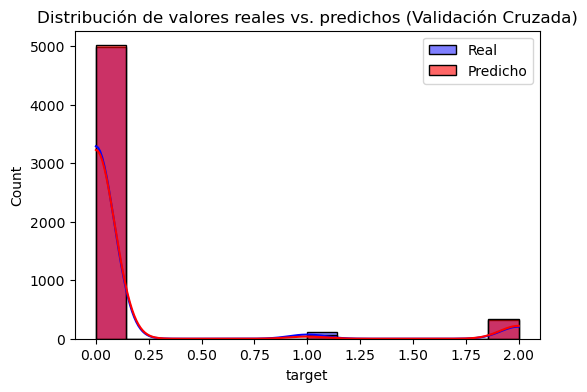

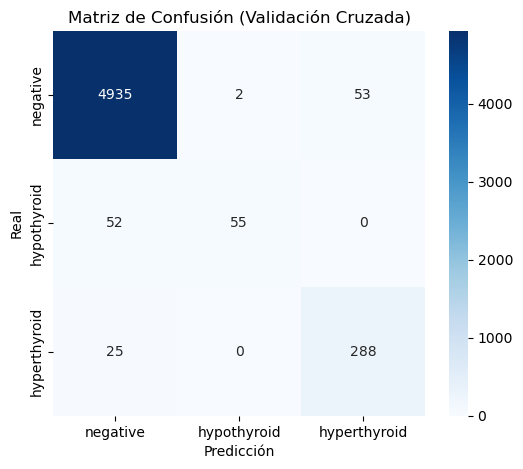

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],   # Número de árboles
    'max_depth': [10, 20, None],      # Profundidad máxima
    'min_samples_split': [2, 5, 10]   # Mínimo de muestras para dividir un nodo
}

# Configurar GridSearchCV con validación cruzada de 5 folds
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs=-1 para usar todos los núcleos

# Entrenar la búsqueda en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Usar el mejor modelo para hacer predicciones con validación cruzada
best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5)

# Evaluar el modelo sin usar el conjunto de test
accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='weighted')

print(f'Accuracy del modelo (validación cruzada): {accuracy}')
print(f'Precisión: {precision}')

# Mostrar el reporte de clasificación
print(classification_report(y_train, y_pred_cv))

# Crear la matriz de confusión
cm = confusion_matrix(y_train, y_pred_cv)

# Graficar la distribución de valores reales vs. predichos
plt.figure(figsize=(6,4))
sns.histplot(y_train, color="blue", label="Real", kde=True)
sns.histplot(y_pred_cv, color="red", label="Predicho", kde=True, alpha=0.6)
plt.legend()
plt.title('Distribución de valores reales vs. predichos (Validación Cruzada)')
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["negative", "hypothyroid", "hyperthyroid"], 
            yticklabels=["negative", "hypothyroid", "hyperthyroid"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Validación Cruzada)")
plt.show()


### Modelo SVM

Accuracy del modelo: 0.8583732057416268
Precisión: 0.8404449825809363
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       854
           1       0.61      0.27      0.38       114
           2       0.71      0.64      0.67        77

    accuracy                           0.86      1045
   macro avg       0.73      0.62      0.66      1045
weighted avg       0.84      0.86      0.84      1045



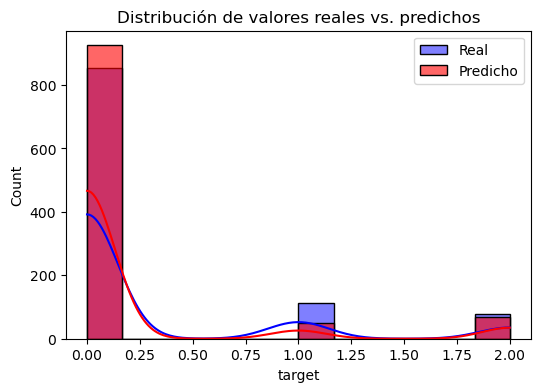

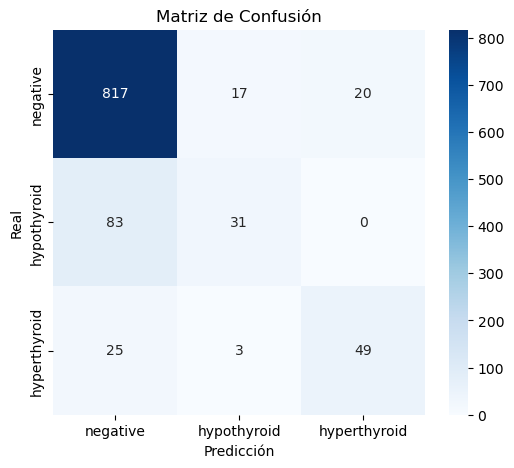

In [22]:
from sklearn.svm import SVC


# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', random_state=42)
modelo_svm.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = modelo_svm.predict(X_test)
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')
print("Precisión:", precision_score(y_test, y_pred, average='weighted'))

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))


# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(6,4))
sns.histplot(y_test, color="blue", label="Real", kde=True)
sns.histplot(y_pred, color="red", label="Predicho", kde=True, alpha=0.6)
plt.legend()
plt.title('Distribución de valores reales vs. predichos')
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "hypothyroid", "hyperthyroid"], yticklabels=["negative", "hypothyroid", "hyperthyroid"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


### Modelo de Regresión Logística

Accuracy del modelo: 0.8565
Precisión: 0.841686555947064
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       854
           1       0.57      0.31      0.40       114
           2       0.59      0.64      0.61        77

    accuracy                           0.86      1045
   macro avg       0.69      0.63      0.65      1045
weighted avg       0.84      0.86      0.84      1045



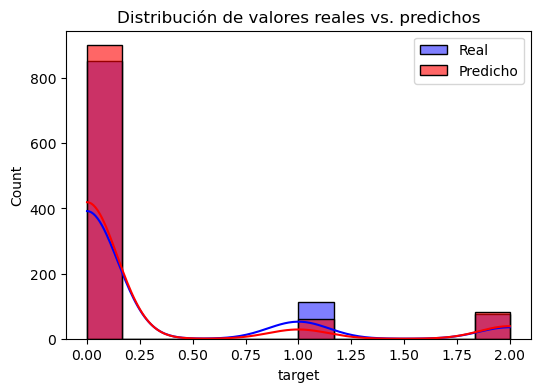

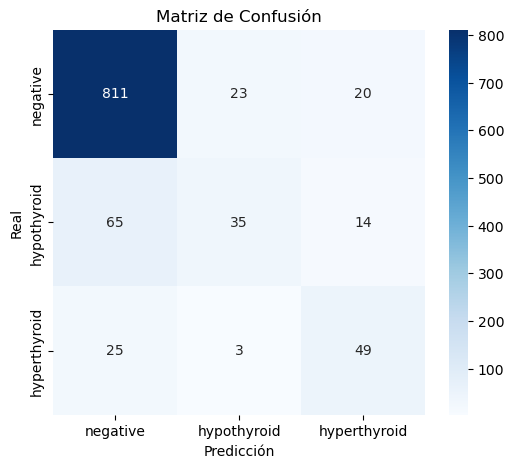

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con los datos escalados
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.4f}')
print("Precisión:", precision_score(y_test, y_pred, average='weighted'))

# Reporte de clasificación con precisión, recall y F1-score
print(classification_report(y_test, y_pred))


plt.figure(figsize=(6,4))
sns.histplot(y_test, color="blue", label="Real", kde=True)
sns.histplot(y_pred, color="red", label="Predicho", kde=True, alpha=0.6)
plt.legend()
plt.title('Distribución de valores reales vs. predichos')
plt.show()

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "hypothyroid", "hyperthyroid"], yticklabels=["negative", "hypothyroid", "hyperthyroid"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## Pipeline

Pipeline que incluye la lectura, preprocesado y ejecución del modelo de Regresión Logística

Accuracy: 0.9549
Precisión: 0.9497502924974042
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1254
           1       0.67      0.27      0.39        22
           2       0.81      0.60      0.69        77

    accuracy                           0.95      1353
   macro avg       0.81      0.62      0.68      1353
weighted avg       0.95      0.95      0.95      1353

Data processing and model training complete.


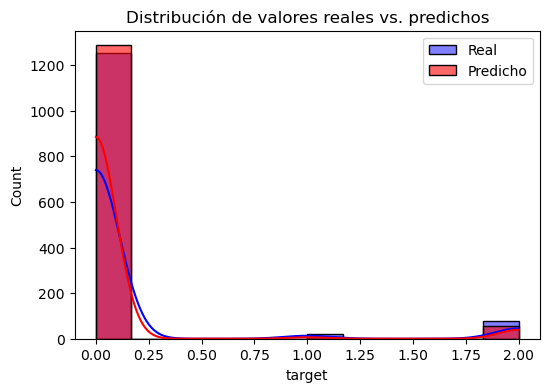

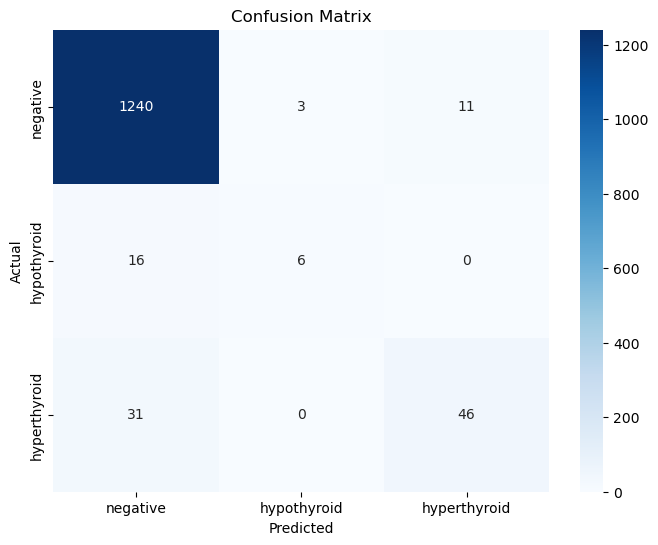

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Cargar datos
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Preprocesamiento
def preprocess_data(df):
    class_mapping = {
        '-': 'negative',
        'K': 'hyperthyroid', 'B': 'hyperthyroid', 'H|K': 'hyperthyroid',
        'KJ': 'hyperthyroid', 'GI': 'hyperthyroid',
        'G': 'hypothyroid', 'I': 'hypothyroid', 'F': 'hypothyroid', 'C|I': 'hypothyroid',
        'E': 'negative', 'LJ': 'negative', 'D|R': 'negative',
    }

    df['target'] = df['target'].map(class_mapping)

    # Drop rows with unmapped or missing target
    df = df.dropna(subset=['target'])
    df = df.dropna(subset=['sex'])
    df = df.drop(columns=['patient_id', 'TBG_measured', 'TBG', 'referral_source'])
    
    # Convertir columnas con valores categóricos a booleanos
    columnas_binarias = [col for col in df.select_dtypes(include=["object"]).columns if df[col].nunique() == 2]
    for col in columnas_binarias:
        valores = df[col].unique()
        df[col] = df[col].map({valores[0]: False, valores[1]: True})

    # Eliminación de valores atípicos
    df_numeric = df.select_dtypes(include=["number"])
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Convertir la columna target a numérica
    df["target"] = df["target"].map({"hyperthyroid": 2, "hypothyroid": 1, "negative": 0})
    
    return df

# División en conjuntos
def split_data(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['target'])
    y = df['target']
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Pipeline de standard scaler y regresión logística con imputación de valores faltantes
def create_pipeline():
    pipeline = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ])
    return pipeline

# Entrenar y evaluar modelo de regresión logística
def train_logistic_regression(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Precisión:", precision_score(y_test, y_pred, average='weighted'))
    print("Classification Report:")
    print(report)
    
    return pipeline, y_pred

# Graficar distribución de valores reales vs. predichos y matriz de confusión
def graficar(y_test, y_pred):
    
    print("Data processing and model training complete.")
    plt.figure(figsize=(6,4))
    sns.histplot(y_test, color="blue", label="Real", kde=True)
    sns.histplot(y_pred, color="red", label="Predicho", kde=True, alpha=0.6)
    plt.legend()
    plt.title('Distribución de valores reales vs. predichos')
    plt.show()
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'hypothyroid', 'hyperthyroid'], yticklabels=['negative', 'hypothyroid', 'hyperthyroid'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Ejecutar el pipeline
file_path = "data/thyroidDF.csv"
df = load_data(file_path)
df = preprocess_data(df)
X_train, X_test, y_train, y_test = split_data(df)
pipeline = create_pipeline()
model, y_pred = train_logistic_regression(pipeline, X_train, X_test, y_train, y_test)
graficar(y_test, y_pred)


## Pipeline con Cross-Validation

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Accuracy promedio (CV): 0.9562
Precisión promedio (CV): 0.9521
Classification Report (CV):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6244
           1       0.63      0.35      0.45       129
           2       0.83      0.66      0.73       390

    accuracy                           0.96      6763
   macro avg       0.81      0.66      0.72      6763
weighted avg       0.95      0.96      0.95      6763



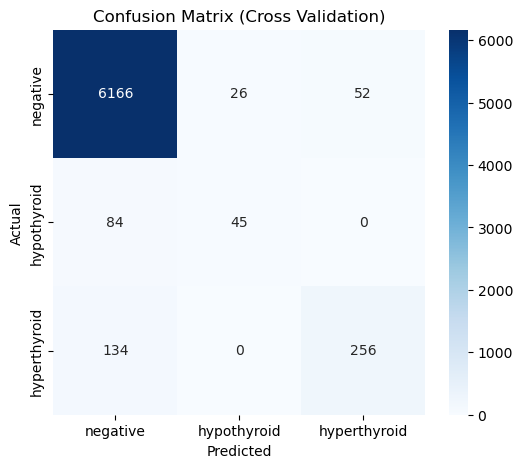

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el pipeline con preprocesamiento y regresión logística
def create_pipeline():
    pipeline = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ])
    return pipeline

# Aplicar validación cruzada en el pipeline
def evaluate_pipeline_with_cv(pipeline, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Se usa estratificación para equilibrio de clases
    
    # Evaluación con cross_val_score
    accuracy_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='precision_weighted')

    print(f"Accuracy promedio (CV): {accuracy_scores.mean():.4f}")
    print(f"Precisión promedio (CV): {precision_scores.mean():.4f}")

    # Obtener predicciones con validación cruzada
    y_pred_cv = cross_val_predict(pipeline, X, y, cv=cv)

    # Reporte de clasificación
    print("Classification Report (CV):")
    print(classification_report(y, y_pred_cv))

    return y_pred_cv

# Graficar matriz de confusión
def graficar(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['negative', 'hypothyroid', 'hyperthyroid'], 
                yticklabels=['negative', 'hypothyroid', 'hyperthyroid'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Cross Validation)")
    plt.show()

# Ejecutar el pipeline con validación cruzada
file_path = "data/thyroidDF.csv"
df = load_data(file_path)
df = preprocess_data(df)

X = df.drop(columns=['target'])
y = df['target']

pipeline = create_pipeline()
y_pred_cv = evaluate_pipeline_with_cv(pipeline, X, y)
graficar(y, y_pred_cv)
